### PREPARING THE TEST DATASET :

##### Importing the libraries :

In [53]:
import pandas as pd
import numpy as np
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re
from wordcloud import WordCloud
from tqdm import tqdm
from datetime import datetime, date

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import coo_matrix
from scipy.sparse import hstack
from scipy.sparse import vstack
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.preprocessing import OneHotEncoder
import pickle
import joblib

##### Reading the test file :

In [55]:
test_df = pd.read_csv(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\test_users.csv\test_users.csv')
print('Shape of the Test Data : ',test_df.shape)
print('Columns of Test Data : ', test_df.columns)
test_df.head()

Shape of the Test Data :  (62096, 15)
Columns of Test Data :  Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


##### Reading the proccessed session data :

In [56]:
session_df_unq_rec1 = pd.read_csv(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\sessions.csv\sessions_preprocessed1.csv')
print('Shape of the Train Data : ',session_df_unq_rec1.shape)
print('Columns of Train Data : ', session_df_unq_rec1.columns)
session_df_unq_rec1.head()

Shape of the Train Data :  (135483, 13)
Columns of Train Data :  Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed', 'unique_action', 'unique_action_type',
       'unique_action_detail', 'unique_device_type', 'Total_secs_elapsed',
       'Mean_secs_elapsed', 'session_count'],
      dtype='object')


,user_id,action,action_type,action_detail,device_type,secs_elapsed,unique_action,unique_action_type,unique_action_detail,unique_device_type,Total_secs_elapsed,Mean_secs_elapsed,session_count
0,00023iyk9l,"['index', 'dashboard', 'header_userpic', 'dash...","['view', 'view', 'data', 'view', 'partner_call...","['view_search_results', 'dashboard', 'header_u...","['Mac Desktop', 'Mac Desktop', 'Mac Desktop', ...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ...","requested,personalize,header_userpic,pending,n...","data,partner_callback,click,message_post,na,vi...","wishlist_content_update,message_post,header_us...","Mac Desktop,iPhone",867896.0,21697.400000,40
1,0010k6l0om,"['search_results', 'show', 'personalize', 'sho...","['click', 'view', 'data', 'na', 'click', 'clic...","['view_search_results', 'p3', 'wishlist_conten...","['Mac Desktop', 'Mac Desktop', 'Mac Desktop', ...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,...","personalize,header_userpic,show,callback,index...","data,partner_callback,click,na,-unknown-,view","wishlist_content_update,header_userpic,na,-unk...",Mac Desktop,586543.0,9310.206349,63
2,001wyh0pz8,"['search', 'search', 'search', 'show', 'social...","['click', 'click', 'click', 'view', 'data', '-...","['view_search_results', 'view_search_results',...","['Android App Unknown Phone/Tablet', 'Android ...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ...","create,search,active,social_connections,show,i...","data,click,na,-unknown-,view,submit","user_profile,user_social_connections,update_us...",Android App Unknown Phone/Tablet,282965.0,3144.055556,90
3,0028jgx1x1,"['show', 'reviews', 'show', 'search', 'show', ...","['view', 'data', 'view', 'click', 'view', 'cli...","['user_profile', 'listing_reviews', 'p3', 'vie...","['-unknown-', '-unknown-', '-unknown-', '-unkn...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0...","create,search,active,show,reviews","data,click,-unknown-,view,submit","p3,create_user,-unknown-,user_profile,listing_...","Android Phone,-unknown-",297010.0,9580.967742,31
4,002qnbzfs5,"['social_connections', 'payment_methods', 'cre...","['data', '-unknown-', '-unknown-', 'view', 'da...","['user_social_connections', '-unknown-', '-unk...","['iPhone', 'iPhone', 'iPhone', 'iPhone', 'iPho...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782...","click,10,header_userpic,push_notification_call...","data,click,message_post,na,-unknown-,view,book...","header_userpic,confirm_email_link,book_it,mess...","iPhone,-unknown-",6487080.0,8221.901141,789


##### Merging the test and session data:

In [57]:
test_session_df = test_df.merge(session_df_unq_rec1, left_on = 'id', right_on = 'user_id', how = 'left')
test_session_df.head(3)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,action_detail,device_type,secs_elapsed,unique_action,unique_action_type,unique_action_detail,unique_device_type,Total_secs_elapsed,Mean_secs_elapsed,session_count
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,...,"['user_profile', 'view_search_results', 'view_...","['-unknown-', '-unknown-', '-unknown-', '-unkn...","[79.0, 17962.0, 64883.0, 31180.0, nan, 1097.0,...","search,active,show,authenticate,reviews","data,click,-unknown-,view,submit","p3,-unknown-,login,user_profile,listing_review...","iPhone,-unknown-",119187.0,14898.375000,8.0
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,...,"['dashboard', 'login_page', 'view_search_resul...","['iPhone', 'iPhone', '-unknown-', 'iPhone', '-...","[747.0, 3228.0, 57599.0, nan, 2956.0, 2292.0, ...","create,header_userpic,search,active,signup_log...","data,click,-unknown-,view,submit","login_page,user_profile,header_userpic,create_...","iPhone,-unknown-",250119.0,13164.157895,19.0
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,...,"['view_search_results', 'view_search_results',...","['Windows Desktop', 'Windows Desktop', 'Window...","[3619.0, 2675.0, 768.0, 31171.0, 24526.0, 1241...","create,personalize,header_userpic,show,index,p...","data,click,-unknown-,view,submit","wishlist_content_update,p1,header_userpic,crea...",Windows Desktop,975575.0,16820.258621,58.0


In [58]:
test_session_df.shape

(62096, 28)

We will be using all the test records both with and without session data.

##### Creating necessary features for test data :

In [59]:
test_session_df['date_account_created'] = pd.to_datetime(test_session_df['date_account_created'])
test_session_df['account_created_day'] = test_session_df['date_account_created'].dt.weekday
test_session_df['account_created_month'] = test_session_df['date_account_created'].dt.month
test_session_df['account_created_year'] = test_session_df['date_account_created'].dt.year

In [60]:
test_session_df.head(3)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,unique_action,unique_action_type,unique_action_detail,unique_device_type,Total_secs_elapsed,Mean_secs_elapsed,session_count,account_created_day,account_created_month,account_created_year
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,...,"search,active,show,authenticate,reviews","data,click,-unknown-,view,submit","p3,-unknown-,login,user_profile,listing_review...","iPhone,-unknown-",119187.0,14898.375000,8.0,1,7,2014
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,...,"create,header_userpic,search,active,signup_log...","data,click,-unknown-,view,submit","login_page,user_profile,header_userpic,create_...","iPhone,-unknown-",250119.0,13164.157895,19.0,1,7,2014
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,...,"create,personalize,header_userpic,show,index,p...","data,click,-unknown-,view,submit","wishlist_content_update,p1,header_userpic,crea...",Windows Desktop,975575.0,16820.258621,58.0,1,7,2014


In [61]:
test_session_df.isnull().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                     False
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser              False
user_id                     True
action                      True
action_type                 True
action_detail               True
device_type                 True
secs_elapsed                True
unique_action               True
unique_action_type          True
unique_action_detail        True
unique_device_type          True
Total_secs_elapsed          True
Mean_secs_elapsed           True
session_count               True
account_created_day        False
account_created_month      False
account_cr

In [62]:
print('Total Null Values in Age field : ',test_session_df['age'].isnull().sum())
print('Total Null Values in date_first_booking field : ',test_session_df['date_first_booking'].isnull().sum())
print('Total Null Values in first_affiliate_tracked field : ',test_session_df['first_affiliate_tracked'].isnull().sum())

Total Null Values in Age field :  28876
Total Null Values in date_first_booking field :  62096
Total Null Values in first_affiliate_tracked field :  20


In [63]:
print('Percentage (%) of Null Records in Age : ', round(((test_session_df['age'].isnull().sum()*100)/test_session_df.shape[0]),3))
print('Percentage (%) of Null Records in date_first_booking : ', round(((test_session_df['date_first_booking'].isnull().sum()*100)/test_session_df.shape[0]),3))
print('Percentage (%) of Null Records in first_affiliate_tracked : ', round(((test_session_df['first_affiliate_tracked'].isnull().sum()*100)/test_session_df.shape[0]),3))

Percentage (%) of Null Records in Age :  46.502
Percentage (%) of Null Records in date_first_booking :  100.0
Percentage (%) of Null Records in first_affiliate_tracked :  0.032


##### Processing the 'age' field:

In [64]:
print('Median Age : ', test_session_df['age'].median())

Median Age :  31.0


In [65]:
#Replacing the null values in 'age' field with median value :

test_session_df['age'] = test_session_df['age'].fillna(test_session_df['age'].median())

In [66]:
#Function to replace any value of age less than 15 or greater than 2007 with the median age

def func_age_imput_median(age):
    
    """
    Function to replace any value of age less than 15 or greater than 2007 with the median age
    
    parameters: age 
    
    returns : age  
    
    """
    
    if age < 15.0 or age > 2007.0:
        return 31.0
    else:
        return age

In [67]:
test_session_df['age'] = test_session_df['age'].apply(func_age_imput_median)
print('Max Age After Median Imputation : ' ,test_session_df['age'].max())

Max Age After Median Imputation :  2002.0


In [68]:
#Checking with the condition given in point 4 :

x = test_session_df[(test_session_df['age'] > 117) & (test_session_df['age'] < 2002)]
x.shape

(48, 31)

In [69]:
x.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,unique_action,unique_action_type,unique_action_detail,unique_device_type,Total_secs_elapsed,Mean_secs_elapsed,session_count,account_created_day,account_created_month,account_created_year
9468,o4e7oybzbc,2014-07-17,20140717055247,NaN,MALE,1937.0,basic,23,en,direct,...,"create,recommendations,search,unavailabilities...","data,click,message_post,na,-unknown-,view,submit","user_listings,user_profile,user_social_connect...","-unknown-,Android Phone",5670828.0,16156.205128,351.0,3,7,2014
10803,rykj2j5rje,2014-07-18,20140718191857,NaN,MALE,1934.0,basic,23,en,direct,...,"spoken_languages,create,recommendations,patch,...","data,click,na,-unknown-,view,submit","user_profile,user_social_connections,update_us...",Android Phone,1735544.0,8591.801980,202.0,4,7,2014
11986,vl4y9qws33,2014-07-20,20140720064349,NaN,FEMALE,1922.0,basic,0,en,direct,...,"spoken_languages,currencies,patch,header_userp...","data,click,partner_callback,na,-unknown-,view,...","user_profile,user_social_connections,confirm_e...","-unknown-,Android Phone",2019783.0,31073.584615,65.0,6,7,2014
14040,ikjyw6axqp,2014-07-22,20140722181133,NaN,FEMALE,1931.0,google,12,en,direct,...,"patch,header_userpic,active,apply_code,show,co...","data,click,na,-unknown-,view,submit","confirm_email_link,header_userpic,update_user,...",Android Phone,617326.0,20577.533333,30.0,1,7,2014
14210,v6bvatw55t,2014-07-22,20140722204601,NaN,FEMALE,1944.0,basic,23,en,direct,...,"create,recommendations,search,active,show,soci...","data,click,na,-unknown-,view,submit","user_profile,user_social_connections,view_rese...",Android Phone,433098.0,5413.725000,80.0,1,7,2014
15221,pz3sr0m9ba,2014-07-23,20140723185108,NaN,FEMALE,1954.0,basic,23,en,direct,...,"create,unavailabilities,search,active,show,soc...","data,click,na,-unknown-,view,submit","user_listings,p3,user_social_connections,updat...",Android Phone,611998.0,20399.933333,30.0,2,7,2014
15872,gyd907ihfl,2014-07-24,20140724071518,NaN,MALE,1940.0,basic,23,en,direct,...,"create,search,active,show,collections,campaign...","click,na,-unknown-,view,submit","view_locations,na,-unknown-,notifications,user...",Android Phone,179914.0,6663.481481,27.0,3,7,2014
17318,dx1gt0ymcy,2014-07-26,20140726025115,NaN,MALE,1940.0,google,12,en,direct,...,"recommendations,search,active,social_connectio...","data,click,na,-unknown-,view,submit","user_listings,p3,user_social_connections,updat...",Android Phone,2264862.0,6781.023952,334.0,5,7,2014
17413,f5ajezybph,2014-07-26,20140726053619,NaN,FEMALE,1947.0,basic,23,en,direct,...,"create,active,na,campaigns,payment_instruments...","data,message_post,na,-unknown-,submit","message_post,update_user,na,-unknown-,payment_...",Android Phone,1137575.0,87505.769231,13.0,5,7,2014
18886,c3fsgcxwwn,2014-07-28,20140728075259,NaN,FEMALE,1927.0,basic,0,en,direct,...,"recommendations,header_userpic,search,unavaila...","data,click,partner_callback,na,-unknown-,view,...","login_page,user_profile,user_social_connection...","Android Phone,-unknown-",4000076.0,12861.980707,311.0,0,7,2014


In [70]:
def func_age_imput_year(age,year):
    
    """
    Function to check if age is between 117 and 2007. If true, it will substract that age value from the year of account 
    creation to get the exact age of the user on the year he created the account.
        
    parameters: age,account_created_year 
    
    returns : age  
    
    """
    
    res = 0
    if age > 117.0 and age <=2007.0:
        res = year-age
        return res 
    else:
        return age

In [71]:
test_session_df['age'] = test_session_df.apply(lambda x: func_age_imput_year(x['age'], x['account_created_year']), axis=1)

In [72]:
print('Max Age After Year Imputation : ' ,test_session_df['age'].max())

Max Age After Year Imputation :  110.0


In [73]:
test_session_df['age'].describe()

count    62096.000000
mean        33.062226
std          9.875201
min         12.000000
25%         31.000000
50%         31.000000
75%         32.000000
max        110.000000
Name: age, dtype: float64

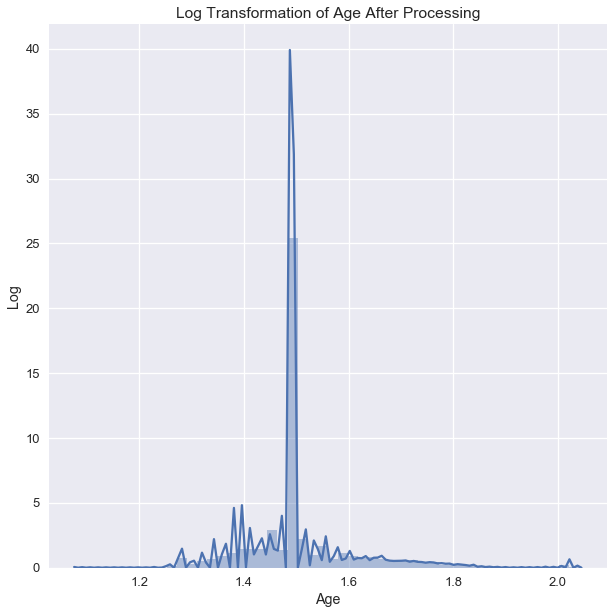

In [74]:
#Plotting the Log Transformation of 'age' after processing the outliers :

plt.figure(figsize = (10,10))
sns.set(style='darkgrid')
sns.set_context('talk')
sns.distplot(np.log10(test_session_df['age'].dropna()))
plt.xlabel('Age')
plt.ylabel('Log')
plt.title('Log Transformation of Age After Processing')
plt.show()

In [75]:
test_session_df.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,unique_action,unique_action_type,unique_action_detail,unique_device_type,Total_secs_elapsed,Mean_secs_elapsed,session_count,account_created_day,account_created_month,account_created_year
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,...,"search,active,show,authenticate,reviews","data,click,-unknown-,view,submit","p3,-unknown-,login,user_profile,listing_review...","iPhone,-unknown-",119187.0,14898.375000,8.0,1,7,2014
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,31.0,basic,0,en,direct,...,"create,header_userpic,search,active,signup_log...","data,click,-unknown-,view,submit","login_page,user_profile,header_userpic,create_...","iPhone,-unknown-",250119.0,13164.157895,19.0,1,7,2014


In [76]:
test_session_df['first_affiliate_tracked'].fillna('untracked',inplace = True)

In [77]:
test_session_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser                  0
user_id                      428
action                       428
action_type                  428
action_detail                428
device_type                  428
secs_elapsed                 428
unique_action                428
unique_action_type           428
unique_action_detail         428
unique_device_type           428
Total_secs_elapsed           428
Mean_secs_elapsed            428
session_count                428
account_created_day            0
account_created_month          0
account_cr

These test records donot have any session data. So, replacing all nulls with 'na'

In [78]:
test_session_df['user_id'].fillna('na' , inplace=True)
test_session_df['action'].fillna('na' , inplace=True)
test_session_df['action_type'].fillna('na' , inplace=True)
test_session_df['action_detail'].fillna('na' , inplace=True)
test_session_df['device_type'].fillna('na' , inplace=True)
test_session_df['secs_elapsed'].fillna(0, inplace=True)
test_session_df['unique_action'].fillna('na' , inplace=True)
test_session_df['unique_action_type'].fillna('na' , inplace=True)
test_session_df['unique_action_detail'].fillna('na' , inplace=True)
test_session_df['unique_device_type'].fillna('na' , inplace=True)
test_session_df['Mean_secs_elapsed'].fillna(0, inplace=True)
test_session_df['session_count'].fillna(0, inplace=True)
test_session_df['Total_secs_elapsed'].fillna(0, inplace=True)

Dropping all the columns that we have already proccessed.

In [79]:
test_session_df = test_session_df.drop(['date_account_created','action', 'action_type', 'action_detail', 'device_type','secs_elapsed','timestamp_first_active','date_first_booking','user_id'], axis = 1)
test_session_df.head(3)

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,unique_action,unique_action_type,unique_action_detail,unique_device_type,Total_secs_elapsed,Mean_secs_elapsed,session_count,account_created_day,account_created_month,account_created_year
0,5uwns89zht,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,...,"search,active,show,authenticate,reviews","data,click,-unknown-,view,submit","p3,-unknown-,login,user_profile,listing_review...","iPhone,-unknown-",119187.0,14898.375000,8.0,1,7,2014
1,jtl0dijy2j,-unknown-,31.0,basic,0,en,direct,direct,untracked,Moweb,...,"create,header_userpic,search,active,signup_log...","data,click,-unknown-,view,submit","login_page,user_profile,header_userpic,create_...","iPhone,-unknown-",250119.0,13164.157895,19.0,1,7,2014
2,xx0ulgorjt,-unknown-,31.0,basic,0,en,direct,direct,linked,Web,...,"create,personalize,header_userpic,show,index,p...","data,click,-unknown-,view,submit","wishlist_content_update,p1,header_userpic,crea...",Windows Desktop,975575.0,16820.258621,58.0,1,7,2014


In [80]:
test_session_df.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser', 'unique_action',
       'unique_action_type', 'unique_action_detail', 'unique_device_type',
       'Total_secs_elapsed', 'Mean_secs_elapsed', 'session_count',
       'account_created_day', 'account_created_month', 'account_created_year'],
      dtype='object')

In [81]:
test_session_df = test_session_df.drop(['id'], axis = 1)
test_session_df.head(3)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,unique_action,unique_action_type,unique_action_detail,unique_device_type,Total_secs_elapsed,Mean_secs_elapsed,session_count,account_created_day,account_created_month,account_created_year
0,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,...,"search,active,show,authenticate,reviews","data,click,-unknown-,view,submit","p3,-unknown-,login,user_profile,listing_review...","iPhone,-unknown-",119187.0,14898.375000,8.0,1,7,2014
1,-unknown-,31.0,basic,0,en,direct,direct,untracked,Moweb,iPhone,...,"create,header_userpic,search,active,signup_log...","data,click,-unknown-,view,submit","login_page,user_profile,header_userpic,create_...","iPhone,-unknown-",250119.0,13164.157895,19.0,1,7,2014
2,-unknown-,31.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,...,"create,personalize,header_userpic,show,index,p...","data,click,-unknown-,view,submit","wishlist_content_update,p1,header_userpic,crea...",Windows Desktop,975575.0,16820.258621,58.0,1,7,2014


##### Loading the vectorizers :

In [82]:
vect_gender = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\vect_gender.pickle', 'rb'))
vect_signup_method = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\vect_signup_method.pickle', 'rb'))
vect_language = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\vect_language.pickle', 'rb'))

vect_affiliate_channel = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\vect_affiliate_channel.pickle', 'rb'))
vect_affiliate_provider = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\vect_affiliate_provider.pickle', 'rb'))
vect_first_affiliate_tracked = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\vect_first_affiliate_tracked.pickle', 'rb'))

vect_signup_app = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\vect_signup_app.pickle', 'rb'))
vect_first_device_type = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\vect_first_device_type.pickle', 'rb'))
vect_first_browser = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\vect_first_browser.pickle', 'rb'))

vect_unique_device_type = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\vect_unique_device_type.pickle', 'rb'))

In [83]:
tfidf_vect_action = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\tfidf_vect_action.pickle', 'rb'))
tfidf_vect_action_type = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\tfidf_vect_action_type.pickle', 'rb'))
tfidf_vect_action_detail = pickle.load(open(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\tfidf_vect_action_detail.pickle', 'rb'))

#### Transforming all the categorical and text fields :

###### 1. Gender

In [84]:
test_session_gender_bow = vect_gender.transform(test_session_df['gender'].values)

In [85]:
test_session_gender_bow.shape

(62096, 4)

##### 2. signup_method

In [86]:
test_session_signup_method_bow = vect_signup_method.transform(test_session_df['signup_method'].values)
print('Test Signup_method vectorizer shape :',test_session_signup_method_bow.shape)

Test Signup_method vectorizer shape : (62096, 3)


##### 3. Language

In [87]:
test_session_language_bow = vect_language.transform(test_session_df['language'].values)
print('Test Signup_method vectorizer shape :',test_session_language_bow.shape)

Test Signup_method vectorizer shape : (62096, 24)


##### 4. Affiliate_channel

In [88]:
test_session_affiliate_channel_bow = vect_affiliate_channel.transform(test_session_df['affiliate_channel'].values)
print('Test Signup_method vectorizer shape :',test_session_affiliate_channel_bow.shape)

Test Signup_method vectorizer shape : (62096, 9)


##### 5. Affiliate_provider

In [89]:
test_session_affiliate_provider_bow = vect_affiliate_provider.transform(test_session_df['affiliate_provider'].values)
print('Test Affiliate_provider vectorizer shape :',test_session_affiliate_provider_bow.shape)

Test Affiliate_provider vectorizer shape : (62096, 18)


##### 6. First_affiliate_tracked

In [90]:
test_session_first_affiliate_tracked_bow = vect_first_affiliate_tracked.transform(test_session_df['first_affiliate_tracked'].values)
print('Test First_affiliate_tracked vectorizer shape :',test_session_first_affiliate_tracked_bow.shape)

Test First_affiliate_tracked vectorizer shape : (62096, 9)


##### 7. Signup_app

In [91]:
test_session_signup_app_bow = vect_signup_app.transform(test_session_df['signup_app'].values)
print('Test Signup_app vectorizer shape :',test_session_signup_app_bow.shape)

Test Signup_app vectorizer shape : (62096, 4)


##### 8. First_device_type

In [92]:
test_session_first_device_type_bow = vect_first_device_type.transform(test_session_df['first_device_type'].values)
print('Test First_device_type vectorizer shape :',test_session_first_device_type_bow.shape)

Test First_device_type vectorizer shape : (62096, 11)


##### 9. First_browser

In [93]:
test_session_first_browser_bow = vect_first_browser.transform(test_session_df['first_browser'].values)
print('Test First_browser vectorizer shape :',test_session_first_browser_bow.shape)

Test First_browser vectorizer shape : (62096, 34)


##### 10. Unique_device_type

In [94]:
test_session_unique_device_type_bow = vect_unique_device_type.transform(test_session_df['unique_device_type'].values)
print('Test Unique_device_type vectorizer shape :',test_session_unique_device_type_bow.shape)

Test Unique_device_type vectorizer shape : (62096, 15)


##### 11. Unique_action

In [95]:
test_session_action_tfidf = tfidf_vect_action.transform(test_session_df['unique_action'].values)
test_session_action_tfidf.shape

(62096, 250)

##### 12. Unique_action_type

In [96]:
test_session_action_type_tfidf = tfidf_vect_action_type.transform(test_session_df['unique_action_type'].values)
test_session_action_type_tfidf.shape

(62096, 148)

##### 13. Unique_action_detail

In [97]:
test_session_action_detail_tfidf = tfidf_vect_action_detail.transform(test_session_df['unique_action_detail'].values)
test_session_action_detail_tfidf.shape

(62096, 121)

In [98]:
test_session_df.head(2)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,unique_action,unique_action_type,unique_action_detail,unique_device_type,Total_secs_elapsed,Mean_secs_elapsed,session_count,account_created_day,account_created_month,account_created_year
0,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,...,"search,active,show,authenticate,reviews","data,click,-unknown-,view,submit","p3,-unknown-,login,user_profile,listing_review...","iPhone,-unknown-",119187.0,14898.375000,8.0,1,7,2014
1,-unknown-,31.0,basic,0,en,direct,direct,untracked,Moweb,iPhone,...,"create,header_userpic,search,active,signup_log...","data,click,-unknown-,view,submit","login_page,user_profile,header_userpic,create_...","iPhone,-unknown-",250119.0,13164.157895,19.0,1,7,2014


In [99]:
test_session_df.columns

Index(['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser', 'unique_action',
       'unique_action_type', 'unique_action_detail', 'unique_device_type',
       'Total_secs_elapsed', 'Mean_secs_elapsed', 'session_count',
       'account_created_day', 'account_created_month', 'account_created_year'],
      dtype='object')

Dropping all the original columns for which transformation is done.

In [100]:
X_Test_vec = test_session_df.drop(['gender', 'signup_method', 'language', 'affiliate_channel','affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser','unique_action','unique_action_type','unique_action_detail','unique_device_type'],axis=1)
X_Test_vec.shape

(62096, 8)

In [101]:
X_Test_vec.columns

Index(['age', 'signup_flow', 'Total_secs_elapsed', 'Mean_secs_elapsed',
       'session_count', 'account_created_day', 'account_created_month',
       'account_created_year'],
      dtype='object')

##### Creating the final Test Data :

In [102]:
X_Test_vec = sparse.hstack((X_Test_vec,test_session_gender_bow,test_session_signup_method_bow,test_session_language_bow,test_session_affiliate_channel_bow,test_session_affiliate_provider_bow,test_session_first_affiliate_tracked_bow,test_session_signup_app_bow,test_session_first_device_type_bow,test_session_first_browser_bow,test_session_unique_device_type_bow,test_session_action_tfidf,test_session_action_type_tfidf,test_session_action_detail_tfidf)).tocsr()
X_Test_vec.shape

(62096, 658)

##### Saving the test data :

In [103]:
#https://stackoverflow.com/questions/8955448/save-load-scipy-sparse-csr-matrix-in-portable-data-format
from scipy import sparse

sparse.save_npz(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\X_Test_vec.npz', X_Test_vec)

In [104]:
X_Test_vec = sparse.load_npz(r'C:\Users\NamrataT\Desktop\CS_1\Dataset\airbnb-recruiting-new-user-bookings\final_dataset\X_Test_vec.npz')

In [105]:
print("Final Preprocessed and Vectorized Dataset :")
print('Test Dataset : ',X_Test_vec.shape)

Final Preprocessed and Vectorized Dataset :
Test Dataset :  (62096, 658)


### SUMMARY :

In this notebook, we have loaded the test file and the proccessed sessions data. Then we merged the sessions data with the test data in such a way so as to keep all the test records both with and without session information.
Once the merged test file is created we load all the vectorizers and then transform the columns. Finally the vectorized test file is saved for modelling.